In [137]:
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import time
from tqdm import tqdm
from sklearn.metrics import f1_score
import glob

In [138]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
print ('Modules loaded')

Modules loaded


In [3]:
# Reading input images and assigning labels based on folder names
print(os.listdir("data/for_image"))


#Capturing training data and labels into respective lists
train_images = []
train_labels = [] 
dir='data/for_image/train'


for label in os.listdir(dir):
    label_path = os.path.join(dir, label)
    print(label)
    for img_path in glob.glob(os.path.join(label_path, "*.JPG")):
        print('inside')    
        print(img_path)
        train_images.append(img_path)
        train_labels.append(label)

['valid', 'test', 'train']
Pongamia Pinnata diseased (P7b)
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0207.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0213.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0039.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0011.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0159.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0171.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0165.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0164.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0170.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0158.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0038.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0212.JPG
inside
for_image/train/Pongamia Pinnata diseased (P7b)/0019_0206.JPG
inside
for_image/train/Pongamia Pinnata dise

In [4]:
train_df=pd.DataFrame({'image':train_images,'label':train_labels})

In [5]:
train_df.head()

,image,label
0,for_image/train/Pongamia Pinnata diseased (P7b)/0019_0207.JPG,Pongamia Pinnata diseased (P7b)
1,for_image/train/Pongamia Pinnata diseased (P7b)/0019_0213.JPG,Pongamia Pinnata diseased (P7b)
2,for_image/train/Pongamia Pinnata diseased (P7b)/0019_0039.JPG,Pongamia Pinnata diseased (P7b)
3,for_image/train/Pongamia Pinnata diseased (P7b)/0019_0011.JPG,Pongamia Pinnata diseased (P7b)
4,for_image/train/Pongamia Pinnata diseased (P7b)/0019_0159.JPG,Pongamia Pinnata diseased (P7b)


In [6]:
# Reading input images and assigning labels based on folder names
print(os.listdir("data/for_image"))

SIZE = (200,300)  #Resize images

#Capturing training data and labels into respective lists
valid_images = []
valid_labels = [] 
dir = 'data/for_image/valid'


for label in os.listdir(dir):
    label_path = os.path.join(dir, label)
    print(label)
    for img_path in glob.glob(os.path.join(label_path, "*.JPG")):
        print('inside')    
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        valid_images.append(img_path)
        valid_labels.append(label)

['valid', 'test', 'train']
Pongamia Pinnata diseased (P7b)
inside
for_image/valid/Pongamia Pinnata diseased (P7b)/0019_0010.JPG
inside
for_image/valid/Pongamia Pinnata diseased (P7b)/0019_0006.JPG
inside
for_image/valid/Pongamia Pinnata diseased (P7b)/0019_0007.JPG
inside
for_image/valid/Pongamia Pinnata diseased (P7b)/0019_0009.JPG
inside
for_image/valid/Pongamia Pinnata diseased (P7b)/0019_0008.JPG
Arjun healthy (P1b)
inside
for_image/valid/Arjun healthy (P1b)/0002_0005.JPG
inside
for_image/valid/Arjun healthy (P1b)/0002_0004.JPG
inside
for_image/valid/Arjun healthy (P1b)/0002_0001.JPG
inside
for_image/valid/Arjun healthy (P1b)/0002_0003.JPG
inside
for_image/valid/Arjun healthy (P1b)/0002_0002.JPG
Alstonia Scholaris diseased (P2a)
inside
for_image/valid/Alstonia Scholaris diseased (P2a)/0014_0001.JPG
inside
for_image/valid/Alstonia Scholaris diseased (P2a)/0014_0003.JPG
inside
for_image/valid/Alstonia Scholaris diseased (P2a)/0014_0002.JPG
inside
for_image/valid/Alstonia Scholaris di

In [7]:
# Reading input images and assigning labels based on folder names
print(os.listdir("for_image"))

SIZE = (200,300) #Resize images

#Capturing training data and labels into respective lists
test_images = []
test_labels = [] 
dir = 'data/for_image/test'


for label in os.listdir(dir):
    label_path = os.path.join(dir, label)
    print(label)
    for img_path in glob.glob(os.path.join(label_path, "*.JPG")):
        print('inside')    
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img_path)
        test_labels.append(label)

['valid', 'test', 'train']
Pongamia Pinnata diseased (P7b)
inside
for_image/test/Pongamia Pinnata diseased (P7b)/0019_0005.JPG
inside
for_image/test/Pongamia Pinnata diseased (P7b)/0019_0004.JPG
inside
for_image/test/Pongamia Pinnata diseased (P7b)/0019_0003.JPG
inside
for_image/test/Pongamia Pinnata diseased (P7b)/0019_0002.JPG
inside
for_image/test/Pongamia Pinnata diseased (P7b)/0019_0001.JPG
Arjun healthy (P1b)
inside
for_image/test/Arjun healthy (P1b)/0002_0006.JPG
inside
for_image/test/Arjun healthy (P1b)/0002_0007.JPG
inside
for_image/test/Arjun healthy (P1b)/0002_0010.JPG
inside
for_image/test/Arjun healthy (P1b)/0002_0009.JPG
inside
for_image/test/Arjun healthy (P1b)/0002_0008.JPG
Alstonia Scholaris diseased (P2a)
inside
for_image/test/Alstonia Scholaris diseased (P2a)/0014_0006.JPG
inside
for_image/test/Alstonia Scholaris diseased (P2a)/0014_0007.JPG
inside
for_image/test/Alstonia Scholaris diseased (P2a)/0014_0010.JPG
inside
for_image/test/Alstonia Scholaris diseased (P2a)/0

In [8]:
test_df=pd.DataFrame({'image':test_images,'label':test_labels})
train_df=pd.DataFrame({'image':train_images,'label':train_labels})
valid_df=pd.DataFrame({'image':valid_images,'label':valid_labels})

In [9]:
def trim(df, max_samples, min_samples, column):
    df=df.copy()
    classes=df[column].unique()
    class_count=len(classes)
    length=len(df)
    print ('dataframe initially is of length ',length, ' with ', class_count, ' classes')
    groups=df.groupby(column)    
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby(column)
    for label in df[column].unique(): 
        group=groups.get_group(label)
        count=len(group)    
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group        
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    classes=trimmed_df[column].unique()# return this in case some classes have less than min_samples
    class_count=len(classes) # return this in case some classes have less than min_samples
    length=len(trimmed_df)
    print ('the trimmed dataframe now is of length ',length, ' with ', class_count, ' classes')
    return trimmed_df, classes, class_count


In [10]:
max_samples=200
min_samples=54
column='label'
train_df, classes, class_count=trim(train_df, max_samples, min_samples, column)

dataframe initially is of length  4274  with  22  classes
after trimming, the maximum samples in any class is now  200  and the minimum samples in any class is  54
the trimmed dataframe now is of length  3558  with  22  classes


<Axes: title={'center': 'Number of images per class before augmentation'}, xlabel='label'>

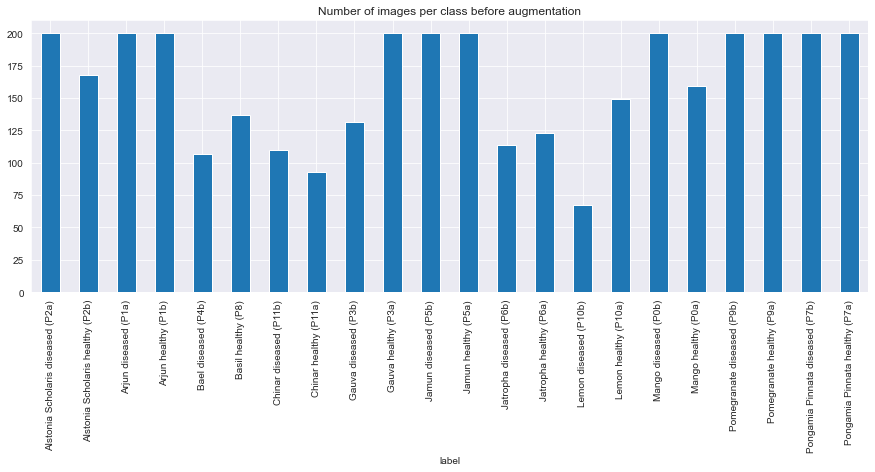

In [25]:
train_df.groupby(['label']).size().plot.bar(figsize=(15, 5), title='Number of images per class before augmentation')

In [11]:
def balance(df, n, working_dir, img_size):
    df=df.copy()
    print('Initial length of dataframe is ', len(df))
    aug_dir=os.path.join(working_dir, 'aug_seg')# directory to store augmented images
    if os.path.isdir(aug_dir):# start with an empty directory
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)        
    for label in df['label'].unique():    
        dir_path=os.path.join(aug_dir,label)    
        os.mkdir(dir_path) # make class directories within aug directory
    # create and store the augmented images  
    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2)
    groups=df.groupby('label') # group by class
    for label in df['label'].unique():  # for every class               
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
        sample_count=len(group)   # determine how many samples there are in this class  
        if sample_count< n: # if the class has less than target number of images
            aug_img_count=0
            delta=n - sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images
            msg='{0:40s} for class {1:^30s} creating {2:^5s} augmented images'.format(' ', label, str(delta))
            print(msg, '\r', end='') # prints over on the same line
            aug_gen=gen.flow_from_dataframe( group,  x_col='image', y_col=None, target_size=img_size,
                                            class_mode=None, batch_size=1, shuffle=False, 
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)            
                aug_img_count += len(images)
            total +=aug_img_count
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    aug_fpaths=[]
    aug_labels=[]
    classlist=os.listdir(aug_dir)
    for klass in classlist:
        classpath=os.path.join(aug_dir, klass)     
        flist=os.listdir(classpath)    
        for f in flist:        
            fpath=os.path.join(classpath,f)         
            aug_fpaths.append(fpath)
            aug_labels.append(klass)
    Fseries=pd.Series(aug_fpaths, name='image')
    Lseries=pd.Series(aug_labels, name='label')
    aug_df=pd.concat([Fseries, Lseries], axis=1)         
    df=pd.concat([df,aug_df], axis=0).reset_index(drop=True)
    print('Length of augmented dataframe is now ', len(df))
    return df 

In [12]:
n=200 # number of samples in each class
working_dir=r'./data' # directory to store augmented images
img_size=(200,300) # size of augmented images
train_df=balance(train_df, n, working_dir, img_size)  

Initial length of dataframe is  3558
Found 110 validated image filenames.     for class     Chinar diseased (P11b)     creating  90   augmented images 
Found 93 validated image filenames.      for class     Chinar healthy (P11a)      creating  107  augmented images 
Found 159 validated image filenames.     for class      Mango healthy (P0a)       creating  41   augmented images 
Found 123 validated image filenames.     for class     Jatropha healthy (P6a)     creating  77   augmented images 
Found 114 validated image filenames.     for class    Jatropha diseased (P6b)     creating  86   augmented images 
Found 149 validated image filenames.     for class      Lemon healthy (P10a)      creating  51   augmented images 
Found 107 validated image filenames.     for class      Bael diseased (P4b)       creating  93   augmented images 
Found 131 validated image filenames.     for class      Gauva diseased (P3b)      creating  69   augmented images 
Found 168 validated image filenames.     fo

<Axes: title={'center': 'Number of images per class after augmentation'}, xlabel='label'>

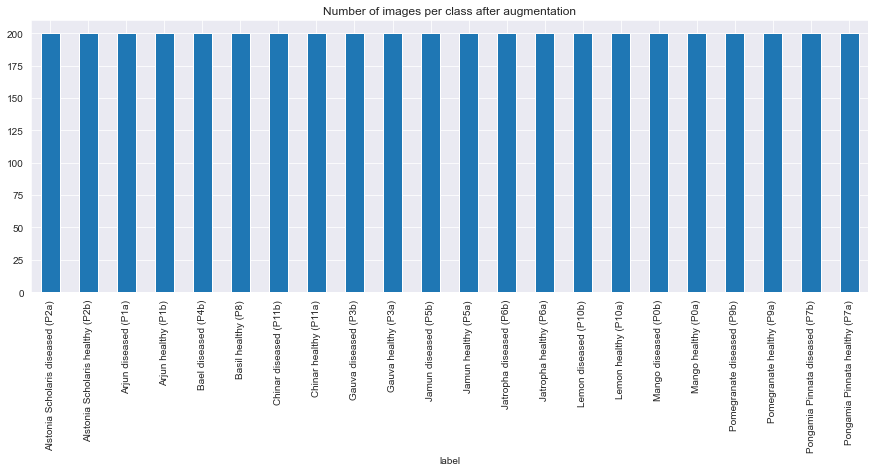

In [28]:
train_df.groupby(['label']).size().plot.bar(figsize=(15, 5), title='Number of images per class after augmentation')

In [13]:
def make_gens(batch_size, train_df, test_df, valid_df, img_size):
    trgen=ImageDataGenerator()
    t_and_v_gen=ImageDataGenerator()
    msg='{0:70s} for train generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    train_gen=trgen.flow_from_dataframe(train_df, x_col='image', y_col='label', target_size=img_size,class_mode='categorical',
                                        color_mode='rgb', shuffle=True, batch_size=batch_size)
    msg='{0:70s} for valid generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='image', y_col='label', target_size=img_size,class_mode='categorical',
                                        color_mode='rgb', shuffle=False, batch_size=batch_size)
    # for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
    # this insures that we go through all the sample in the test set exactly once.
    length=len(test_df)
    test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
    test_steps=int(length/test_batch_size)
    msg='{0:70s} for test generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='image', y_col='label', target_size=img_size,class_mode='categorical',
                                        color_mode='rgb', shuffle=False, batch_size=test_batch_size)
    # from the generator we can get information we will need later
    classes=list(train_gen.class_indices.keys())
    class_indices=list(train_gen.class_indices.values())
    class_count=len(classes)
    labels=test_gen.labels
    print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)
    return train_gen, test_gen, valid_gen, test_batch_size, test_steps, classes


batch_size=20
train_gen, test_gen, valid_gen, test_batch_size, test_steps, classes=make_gens(batch_size, train_df, test_df, valid_df, img_size)


Found 4400 validated image filenames belonging to 22 classes.          for train generator 
Found 110 validated image filenames belonging to 22 classes.           for valid generator 
Found 110 validated image filenames belonging to 22 classes.           for test generator 
test batch size:  55   test steps:  2  number of classes :  22


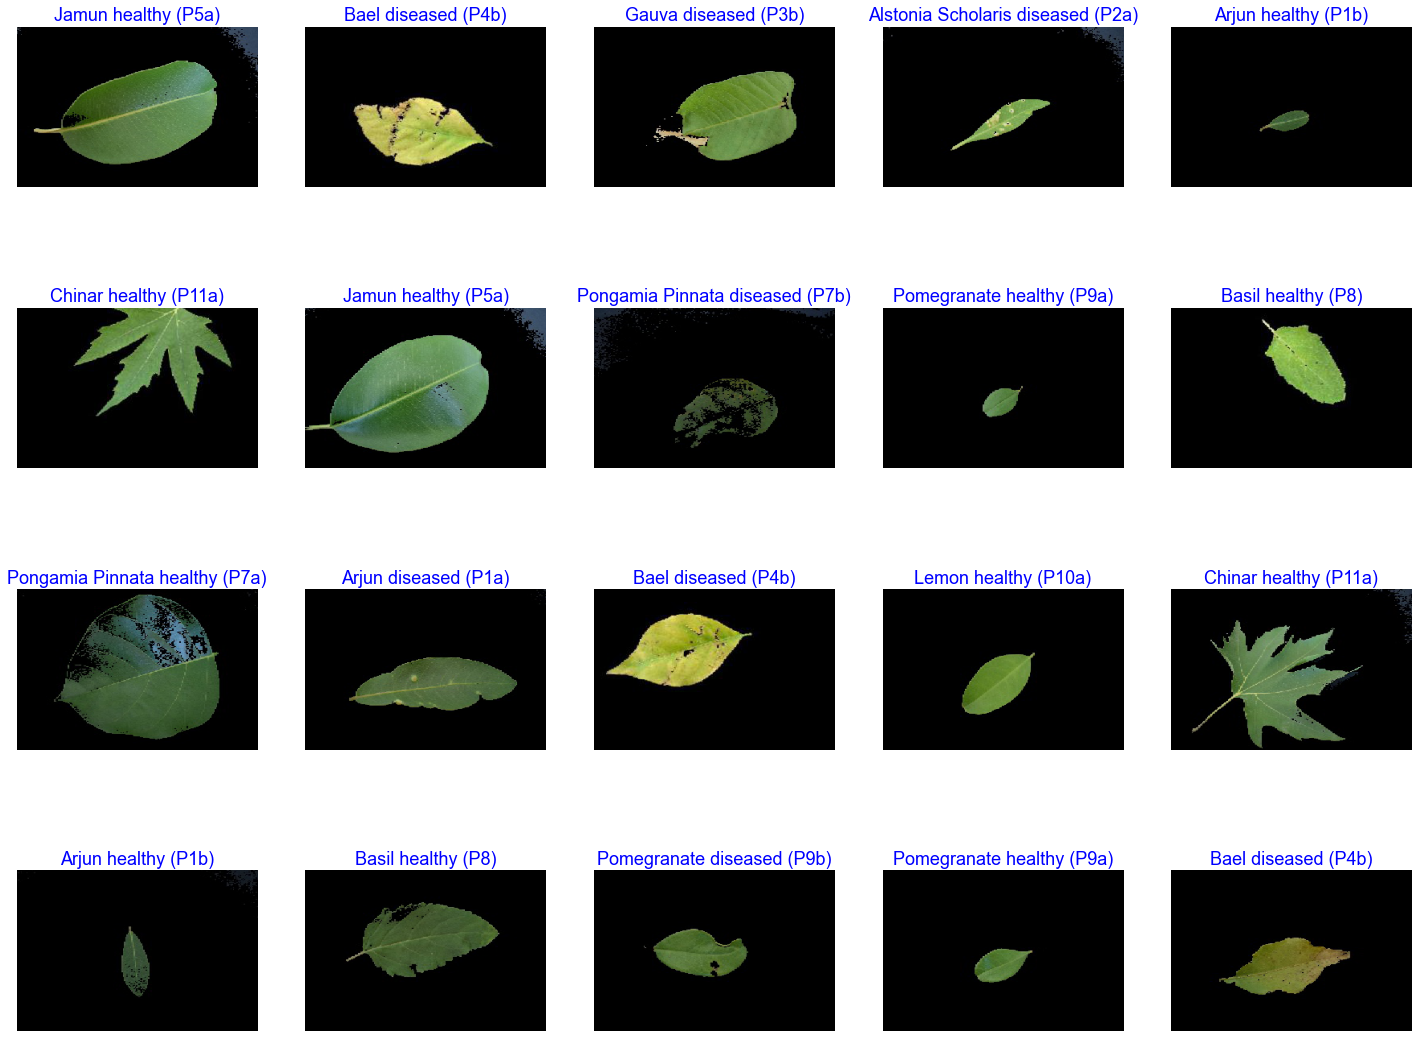

In [32]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(25, 25))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i] /255       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=18)
        plt.axis('off')
    plt.show()
    
show_image_samples(train_gen )

In [14]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [139]:
def make_model(img_size, lr, mod_num=3):  
    img_shape=(img_size[0], img_size[1], 3)
    if mod_num == 0:
        base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')
        msg='Created EfficientNet B0 model'
    elif mod_num == 3:
        base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
        msg='Created EfficientNet B3 model'
    elif mod_num == 5:
        base_model=tf.keras.applications.efficientnet.EfficientNetB5(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
        msg='Created EfficientNet B5 model'
        
    else:
        base_model=tf.keras.applications.efficientnet.EfficientNetB7(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')
        msg='Created EfficientNet B7 model'

    base_model.trainable=True
    x=base_model.output
    x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
    x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
    x=Dropout(rate=.4, seed=123)(x)       
    output=Dense(class_count, activation='softmax')(x)
    model=Model(inputs=base_model.input, outputs=output)
    model.compile(Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 
    msg=msg + f' with initial learning rate set to {lr}'
    print_in_color(msg)
    return model

lr=.001
model=make_model((200,300), lr) # using B3 model by default

Created EfficientNet B3 model with initial learning rate set to 0.001



In [115]:
class LR_ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch, dwell=True, factor=.4): # initialization of the callback
        super(LR_ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        self.lowest_vloss=np.inf
        self.lowest_aloss=np.inf
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.best_epoch=1
        self.plist=[]
        self.alist=[]
        self.dwell= dwell
        self.factor=factor
        
    def get_list(self): # define a function to return the list of % validation change
        return self.plist, self.alist
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            msg =f'Training will proceed until epoch {ask_epoch} then you will be asked to' 
            print_in_color(msg )
            msg='enter H to halt training or enter an integer for how many more epochs to run then be asked again'
            print_in_color(msg)
            if self.dwell:
                msg='learning rate will be automatically adjusted during training'
                print_in_color(msg, (0,255,0))
        self.start_time= time.time() # set the time at which training started
       
    def on_train_end(self, logs=None):   # runs at the end of training  
        msg=f'loading model with weights from epoch {self.best_epoch}'
        print_in_color(msg, (0,255,255))
        model.set_weights(self.best_weights) # set the weights of the model to the best weights
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print_in_color (msg) # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        vloss=logs.get('val_loss')  # get the validation loss for this epoch
        aloss=logs.get('loss')
        if epoch >0:
            deltav = self.lowest_vloss- vloss 
            pimprov=(deltav/self.lowest_vloss) * 100 
            self.plist.append(pimprov)
            deltaa=self.lowest_aloss-aloss
            aimprov=(deltaa/self.lowest_aloss) * 100
            self.alist.append(aimprov)
        else:
            pimprov=0.0 
            aimprov=0.0
        if vloss< self.lowest_vloss:
            self.lowest_vloss=vloss
            self.best_weights=self.model.get_weights() # set best weights to model's initial weights
            self.best_epoch=epoch + 1            
            msg=f'\n validation loss of {vloss:7.4f} is {pimprov:7.4f} % below lowest loss, saving weights from epoch {str(epoch + 1):3s} as best weights'
            print_in_color(msg, (0,255,0)) # green foreground
        else: # validation loss increased
            pimprov=abs(pimprov)
            msg=f'\n validation loss of {vloss:7.4f} is {pimprov:7.4f} % above lowest loss of {self.lowest_vloss:7.4f} keeping weights from epoch {str(self.best_epoch)} as best weights'
            print_in_color(msg, (255,255,0)) # yellow foreground
            if self.dwell: # if dwell is True when the validation loss increases the learning rate is automatically reduced and model weights are set to best weights
                lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
                new_lr=lr * self.factor
                msg=f'learning rate was automatically adjusted from {lr:8.6f} to {new_lr:8.6f}, model weights set to best weights'
                print_in_color(msg) # cyan foreground
                tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer
                model.set_weights(self.best_weights) # set the weights of the model to the best weights      
                
        if aloss< self.lowest_aloss:
            self.lowest_aloss=aloss        
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                msg='\n Enter H to end training or  an integer for the number of additional epochs to run then ask again'
                print_in_color(msg) # cyan foreground
                ans=input()
                
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    msg=f'you entered {ans},  Training halted on epoch {epoch+1} due to user input\n'
                    print_in_color(msg)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        msg=f'you entered {ans} Training will continue to epoch {self.ask_epoch}'
                        print_in_color(msg) # cyan foreground
                        if self.dwell==False:
                            lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
                            msg=f'current LR is  {lr:8.6f}  hit enter to keep  this LR or enter a new LR'
                            print_in_color(msg) # cyan foreground
                            ans=input(' ')
                            if ans =='':
                                msg=f'keeping current LR of {lr:7.5f}'
                                print_in_color(msg) # cyan foreground
                            else:
                                new_lr=float(ans)
                                tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer
                                msg=f' changing LR to {ans}'
                                print_in_color(msg) # cyan foreground

In [122]:
epochs=40
ask_epoch=10
ask=LR_ASK(model, epochs,  ask_epoch)
callbacks=[ask]

In [123]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

Training will proceed until epoch 10 then you will be asked to

enter H to halt training or enter an integer for how many more epochs to run then be asked again

learning rate will be automatically adjusted during training

Epoch 1/40
220/220 [==============================] - ETA: 0s - loss: 7.0739 - accuracy: 0.5645
 validation loss of  4.8860 is  0.0000 % below lowest loss, saving weights from epoch 1   as best weights

220/220 [==============================] - 680s 3s/step - loss: 7.0739 - accuracy: 0.5645 - val_loss: 4.8860 - val_accuracy: 0.5636
Epoch 2/40
220/220 [==============================] - ETA: 0s - loss: 2.6701 - accuracy: 0.8139
 validation loss of  1.8409 is 62.3238 % below lowest loss, saving weights from epoch 2   as best weights

220/220 [==============================] - 784s 4s/step - loss: 2.6701 - accuracy: 0.8139 - val_loss: 1.8409 - val_accuracy: 0.8364
Epoch 3/40
220/220 [==============================] - ETA: 0s - loss: 1.2106 - accuracy: 0.9025
 validatio

In [124]:
def predictor(test_gen):    
    y_pred= []
    error_list=[]
    error_pred_list = []
    y_true=test_gen.labels
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, verbose=1)
    tests=len(preds)    
    for i, p in enumerate(preds):  
        file=test_gen.filenames[i]        
        pred_index=np.argmax(p)         
        true_index=test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors=errors + 1
            file=test_gen.filenames[i]            
            error_class=classes[pred_index]
            t=(file, error_class)
            error_list.append(t)            
        y_pred.append(pred_index)
            
    acc=( 1-errors/tests) * 100
    msg=f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}'
    print_in_color(msg, (0,255,255), (100,100,100)) # cyan foreground
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests, error_list, f1score


2/2 [==============================] - 5s 734ms/step
there were 11 errors in 110 tests for an accuracy of  90.00



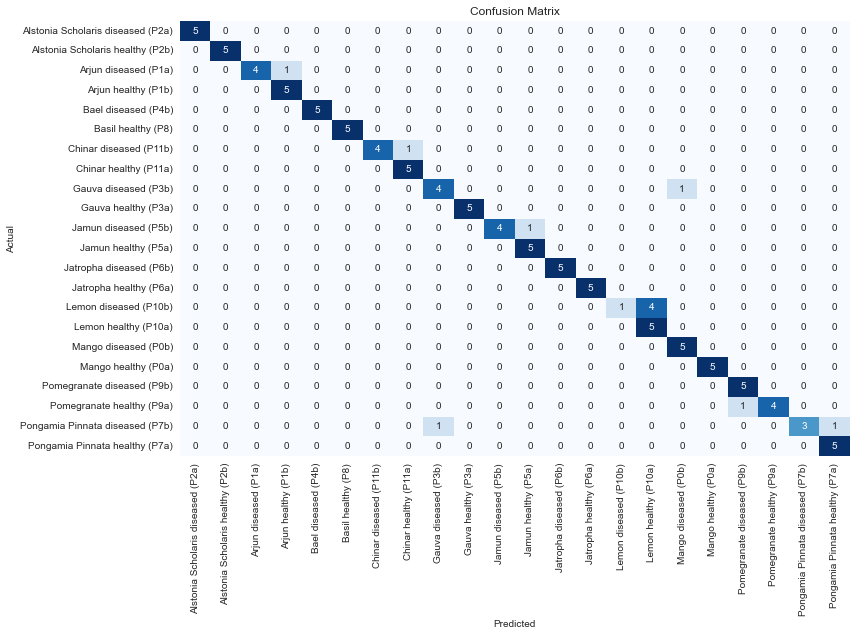

Classification Report:
----------------------
                                    precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)     1.0000    1.0000    1.0000         5
 Alstonia Scholaris healthy (P2b)     1.0000    1.0000    1.0000         5
             Arjun diseased (P1a)     1.0000    0.8000    0.8889         5
              Arjun healthy (P1b)     0.8333    1.0000    0.9091         5
              Bael diseased (P4b)     1.0000    1.0000    1.0000         5
               Basil healthy (P8)     1.0000    1.0000    1.0000         5
           Chinar diseased (P11b)     1.0000    0.8000    0.8889         5
            Chinar healthy (P11a)     0.8333    1.0000    0.9091         5
             Gauva diseased (P3b)     0.8000    0.8000    0.8000         5
              Gauva healthy (P3a)     1.0000    1.0000    1.0000         5
             Jamun diseased (P5b)     1.0000    0.8000    0.8889         5
              Jamun healthy (P5a)     0.8333    1.00

In [126]:
errors, tests, error_list, f1score =predictor(test_gen)

In [135]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    return index_loss

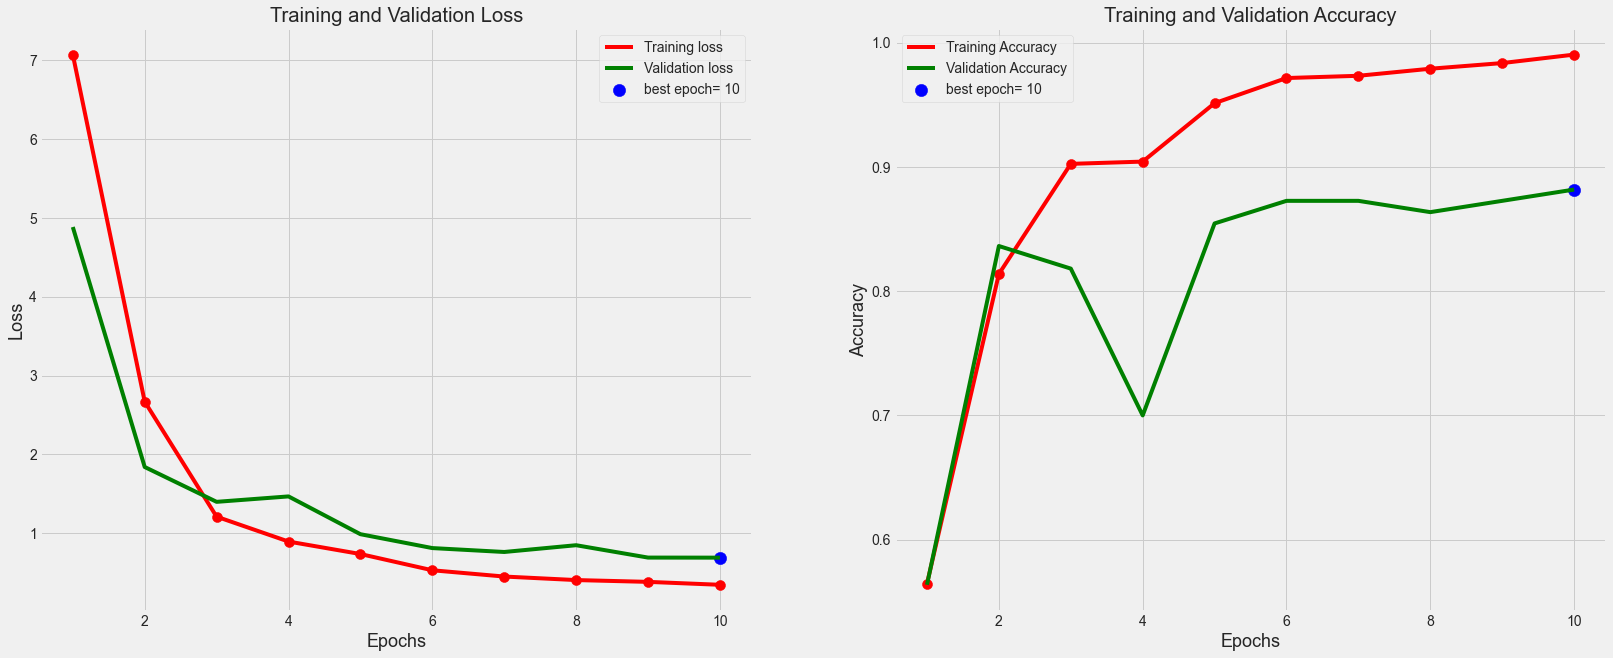

In [136]:
loss_index=tr_plot(history,0)

In [128]:
images_to_predict_path='images to predict'
image_to_predict=os.listdir(images_to_predict_path)

images=[]
for image in range(len(image_to_predict)):
    images.append(os.path.join(images_to_predict_path+'/'+image_to_predict[image]))

for i in range(len(images)):
    img = tf.keras.utils.load_img(
        images[i], target_size=(200, 300)
    )

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image from ( {} ) most likely belongs to {} with a {:.2f} percent confidence."
        .format(images[i],classes[np.argmax(score)], 100 * np.max(score))
    )

1/1 [==============================] - 11s 11s/step
This image from ( images to predict/0020_0271.JPG ) most likely belongs to Pomegranate diseased (P9b) with a 10.09 percent confidence.
1/1 [==============================] - 1s 626ms/step
This image from ( images to predict/0016_0118.JPG ) most likely belongs to Bael diseased (P4b) with a 6.40 percent confidence.
1/1 [==============================] - 0s 49ms/step
This image from ( images to predict/0019_0276.JPG ) most likely belongs to Pongamia Pinnata diseased (P7b) with a 11.32 percent confidence.
1/1 [==============================] - 0s 45ms/step
This image from ( images to predict/0008_0148.JPG ) most likely belongs to Basil healthy (P8) with a 11.06 percent confidence.
1/1 [==============================] - 0s 44ms/step
This image from ( images to predict/0005_0268.JPG ) most likely belongs to Jamun healthy (P5a) with a 10.63 percent confidence.
1/1 [==============================] - 1s 1s/step
This image from ( images to pred